## 데이콘 소득 예측 AI 해커톤

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

### 데이터 확인

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

display(train.head())
display(test.head())

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,850
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570


,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,TEST_0000,79,M,High Junior,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Householder,Native,US,Unknown,Unknown,Single,0,0,0,Under Median
1,TEST_0001,47,M,Elementary (5-6),Children or Armed Forces,0,Not in universe or children,Unknown,White,Other Spanish,...,Child 18 or older,Native,US,US,US,Nonfiler,0,0,0,Under Median
2,TEST_0002,18,F,High Junior,Children or Armed Forces,52,Retail,Services,White,All other,...,Child 18 or older,Native,US,US,US,Single,0,0,0,Under Median
3,TEST_0003,39,F,Associates degree (Vocational),Full-Time,30,Medical (except Hospitals),Services,White,All other,...,Spouse of householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown
4,TEST_0004,6,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,Mexican-American,...,Child under 18 never married,Native,US,US,US,Nonfiler,0,0,0,Unknown


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      20000 non-null  object
 1   Age                     20000 non-null  int64 
 2   Gender                  20000 non-null  object
 3   Education_Status        20000 non-null  object
 4   Employment_Status       20000 non-null  object
 5   Working_Week (Yearly)   20000 non-null  int64 
 6   Industry_Status         20000 non-null  object
 7   Occupation_Status       20000 non-null  object
 8   Race                    20000 non-null  object
 9   Hispanic_Origin         20000 non-null  object
 10  Martial_Status          20000 non-null  object
 11  Household_Status        20000 non-null  object
 12  Household_Summary       20000 non-null  object
 13  Citizenship             20000 non-null  object
 14  Birth_Country           20000 non-null  object
 15  Bi

- ID : 고객 ID
- Age : 나이
- Gender : 성별
- Education_Status : 최종학력
- Employment_Status : 취업 상태
- Working_Week (Yearly) : 주 근무시간
- Industry_Status : 산업분야
- Occupation_Status : 직업 분야
- Race : 인종
- Hispanic_Origin : 히스패닉 출신
- Martial_Status : 결혼 여부
- Household_Status : 가족 구성
- Household_Summary : 가족 구성 요약
- Citizenship : 시민권
- Birth_Country : 국적
- Birth_Country (Father) : 아버지 국적
- Birth_Country (Mother) : 어머니 국적
- Tax_Status : 세금 여부
- Gains : 이득 또는 매출
- Losses : 지출
- Dividends : 배당금
- Income_Status : 소득 상태
- income : 소득

### EDA - 명목형 변수 확인

In [4]:
print(train['Gender'].value_counts())
print('-'*100)
print(train['Education_Status'].value_counts())
print('-'*100)
print(train['Employment_Status'].value_counts())
print('-'*100)
print(train['Industry_Status'].value_counts())
print('-'*100)
print(train['Occupation_Status'].value_counts())
print('-'*100)
print(train['Race'].value_counts())
print('-'*100)
print(train['Hispanic_Origin'].value_counts())
print('-'*100)
print(train['Martial_Status'].value_counts())
print('-'*100)
print(train['Household_Status'].value_counts())
print('-'*100)
print(train['Household_Summary'].value_counts())
print('-'*100)
print(train['Citizenship'].value_counts())
print('-'*100)
print(train['Birth_Country'].value_counts())
print('-'*100)
print(train['Birth_Country (Father)'].value_counts())
print('-'*100)
print(train['Birth_Country (Mother)'].value_counts())
print('-'*100)
print(train['Tax_Status'].value_counts())
print('-'*100)
print(train['Income_Status'].value_counts())

F    10472
M     9528
Name: Gender, dtype: int64
----------------------------------------------------------------------------------------------------
High graduate                     6494
College                           3794
Children                          2208
Bachelors degree                  1956
High Junior                        820
High Sophomore                     799
Associates degree (Vocational)     741
Associates degree (Academic)       609
High Freshman                      555
Middle (7-8)                       548
Masters degree                     505
Elementary (5-6)                   317
High Senior                        242
Elementary (1-4)                   150
Professional degree                111
Doctorate degree                    87
Kindergarten                        64
Name: Education_Status, dtype: int64
----------------------------------------------------------------------------------------------------
Children or Armed Forces         11142
Full-Time 

- 명목형 변수의 경우 각 변수에 해당되는 value 값이 매우 다양하게 분포
- 어떻게 인코딩을 하는지에 따라 성능의 영향이 큼

### EDA - 연속형 변수 확인

In [5]:
print(train['Age'].value_counts())
print('-'*100)
print(train['Working_Week (Yearly)'].value_counts())
print('-'*100)
print(train['Gains'].value_counts())
print('-'*100)
print(train['Losses'].value_counts())
print('-'*100)
print(train['Dividends'].value_counts())
print('-'*100)
print(train['Income'].value_counts())

37    476
35    475
24    473
33    467
31    466
     ... 
84     20
85     16
87     11
89     10
88      9
Name: Age, Length: 91, dtype: int64
----------------------------------------------------------------------------------------------------
52    10613
0      4720
40      440
50      363
48      313
26      283
20      213
12      209
30      207
36      181
32      139
44      138
16      134
51      134
8       129
49      117
35      115
24      105
46       97
45       95
42       94
39       87
28       79
4        78
10       67
25       63
43       58
38       57
6        55
13       54
15       48
18       46
22       45
47       43
2        41
1        34
14       34
3        32
5        32
17       30
7        28
9        23
34       23
37       20
19       13
41       13
27       12
11       10
21        9
29        8
23        8
31        6
33        5
Name: Working_Week (Yearly), dtype: int64
---------------------------------------------------------------------------

- 연속형 변수의 경우 극단적인 이상치가 많이 분포되어 있음
- 하지만 의미없는 value 값은 아니기 때문에 스케일링을 방식을 고민해야 함

### 전처리(1) - Label Encoder

In [6]:
# 명목형 변수를 LabelEncoder를 활용해 수치화
# train, test 데이터 모두 수치화

# 객체가 object인 변수를 리스트에 저장 
encoding_train = list(train.dtypes[train.dtypes == "object"].index)

for i in encoding_train:
    le = LabelEncoder()
    train[i] = le.fit_transform(train[i])

In [7]:
encoding_test = list(test.dtypes[test.dtypes == "object"].index)

for i in encoding_test:
    le = LabelEncoder()
    test[i] = le.fit_transform(test[i])

In [8]:
# 데이터 확인
display(train.head())
display(test.head())

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,0,63,1,15,2,4,20,11,4,0,...,2,39,39,39,4,0,0,0,2,425
1,1,37,1,1,2,52,6,11,4,0,...,2,39,39,39,5,0,0,0,1,0
2,2,58,0,12,2,52,11,0,1,0,...,2,39,39,39,2,3411,0,0,1,860
3,3,44,1,12,2,52,19,12,4,0,...,2,39,39,39,5,0,0,0,1,850
4,4,37,0,12,2,52,19,10,4,0,...,2,39,39,39,0,0,0,0,2,570


,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,0,79,1,9,0,0,14,14,4,0,...,4,2,38,39,40,5,0,0,0,1
1,1,47,1,7,0,0,14,14,4,8,...,0,2,38,38,39,4,0,0,0,1
2,2,18,0,9,0,52,19,11,4,0,...,0,2,38,38,39,5,0,0,0,1
3,3,39,0,1,2,30,12,11,4,0,...,7,2,38,38,39,2,0,0,0,2
4,4,6,1,3,0,0,14,14,4,6,...,2,2,38,38,39,4,0,0,0,2


### 전처리(2) - 표준화(스케일링)

- 명목형 변수를 인코딩을 해주었지만, value의 편차가 매우 큼
- 연속형 변수도 마찬가지로 이상치가 많았고, 한 클래스에 몰려 있어 값을 표준화할 필요가 있음
- 표준화 결과 성능에 안좋은 영향을 미침

In [9]:
# from sklearn.preprocessing import StandardScaler

# train_columns = train.columns
# test_columns = test.columns

# # Standardization 평균 0 / 분산 1
# scaler = StandardScaler()   

# scaled_train = scaler.fit_transform(train)
# scaled_test = scaler.fit_transform(test)

# scaled_train = pd.DataFrame(scaled_train, columns=train_columns)
# scaled_test = pd.DataFrame(scaled_test, columns=test_columns)

In [10]:
# # 데이터 확인
# display(scaled_train.head())
# display(scaled_test.head())

### 다중회귀분석

- 유의수준 0.05에서 따졌을 때 22개의 변수 중 11개 변수(ID, Employment_Status, Industry_Status, Race, Household_Status, Household_Summary, Citizenship, Birth_Country (Father), Birth_Country (Mother), Losses, Dividends)가 유의하지 않음
- 유의하지 않은 변수 중에 연관이 있는 변수도 있고, 그렇지 않은 변수도 존재

### 상관분석

In [11]:
# 상관분석
train.corr()

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
ID,1.000000,-0.008429,0.002362,-0.012284,0.000263,-0.000578,0.006030,0.011509,0.008566,-0.002564,...,0.005496,0.007447,0.008903,0.004086,-0.009865,-0.013664,-0.009466,-0.007843,0.003845,-0.008760
Age,-0.008429,1.000000,-0.038892,0.267565,0.179449,0.206218,-0.052182,-0.124579,0.053450,-0.086805,...,-0.061182,-0.035017,-0.019237,-0.020456,-0.280926,0.044156,0.053384,0.107565,-0.040451,0.124795
Gender,0.002362,-0.038892,1.000000,0.030605,-0.003425,0.076096,-0.040227,-0.040741,0.010982,0.024941,...,-0.022237,-0.017245,-0.008590,-0.018111,0.088306,0.051484,0.062227,0.009609,-0.050970,0.093893
Education_Status,-0.012284,0.267565,0.030605,1.000000,0.102765,0.109949,-0.014813,-0.105499,0.010528,0.014907,...,-0.003265,-0.014586,0.003786,0.011825,-0.075069,-0.003991,0.009711,-0.006892,0.016496,0.031286
Employment_Status,0.000263,0.179449,-0.003425,0.102765,1.000000,0.069562,-0.006774,-0.053366,-0.010061,-0.013652,...,-0.035374,-0.026513,-0.017751,-0.016750,-0.039390,-0.002199,0.009535,0.022857,-0.013170,0.033009
Working_Week (Yearly),-0.000578,0.206218,0.076096,0.109949,0.069562,1.000000,-0.102496,-0.566186,0.043816,-0.081281,...,-0.017902,-0.001957,0.056557,0.057049,-0.218456,0.053362,0.056658,0.002209,-0.049282,0.419628
Industry_Status,0.006030,-0.052182,-0.040227,-0.014813,-0.006774,-0.102496,1.000000,0.245686,-0.007089,-0.004573,...,0.015892,0.023321,0.010923,0.004078,0.058219,-0.006169,0.009149,0.007327,0.016589,-0.083369
Occupation_Status,0.011509,-0.124579,-0.040741,-0.105499,-0.053366,-0.566186,0.245686,1.000000,-0.052846,0.034223,...,0.009292,-0.001760,-0.041329,-0.037394,0.162515,-0.016767,-0.022439,0.010149,0.015122,-0.348873
Race,0.008566,0.053450,0.010982,0.010528,-0.010061,0.043816,-0.007089,-0.052846,1.000000,0.081591,...,0.152752,0.071172,0.066398,0.057474,-0.016312,0.007836,0.002274,0.031288,-0.005009,0.024573
Hispanic_Origin,-0.002564,-0.086805,0.024941,0.014907,-0.013652,-0.081281,-0.004573,0.034223,0.081591,1.000000,...,-0.054963,-0.231598,-0.290670,-0.272545,0.003242,-0.010351,-0.013606,-0.029285,0.012931,-0.073829


- 상관분석 결과, 변수 간 강한 상관성을 보이는 경우는 거의 없음
- 다중회귀분석 결과를 기반으로 변수를 제거하는 방향이 좋아 보임
- 유의하지 않은 11개 변수(ID, Employment_Status, Industry_Status, Race, Household_Status, Household_Summary, Citizenship, Birth_Country (Father), Birth_Country (Mother), Losses, Dividends) 중 의미 없는 변수만 제거하는게 좋음

In [12]:
# 변수 제거
# ID : 고유 아이디로 예측엔 불필요
# Household_Status : Household_Summary에서 충분히 설명 가능
# train = scaled_train.drop(['ID', 'Household_Status'], axis=1)
# test = scaled_test.drop(['ID', 'Household_Status'], axis=1)
train = train.drop(['ID', 'Household_Status'], axis=1)
test = test.drop(['ID', 'Household_Status'], axis=1)

In [13]:
# 최종 데이터 확인
display(train.head())
display(test.head())

,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,63,1,15,2,4,20,11,4,0,1,...,2,39,39,39,4,0,0,0,2,425
1,37,1,1,2,52,6,11,4,0,4,...,2,39,39,39,5,0,0,0,1,0
2,58,0,12,2,52,11,0,1,0,1,...,2,39,39,39,2,3411,0,0,1,860
3,44,1,12,2,52,19,12,4,0,0,...,2,39,39,39,5,0,0,0,1,850
4,37,0,12,2,52,19,10,4,0,0,...,2,39,39,39,0,0,0,0,2,570


,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,79,1,9,0,0,14,14,4,0,5,4,2,38,39,40,5,0,0,0,1
1,47,1,7,0,0,14,14,4,8,5,0,2,38,38,39,4,0,0,0,1
2,18,0,9,0,52,19,11,4,0,5,0,2,38,38,39,5,0,0,0,1
3,39,0,1,2,30,12,11,4,0,1,7,2,38,38,39,2,0,0,0,2
4,6,1,3,0,0,14,14,4,6,5,2,2,38,38,39,4,0,0,0,2


### 모델링(1) - RandomForest

- 수요 예측을 위해 분류가 아닌 회귀 모델을 사용
- Baseline 모델을 RandomForest 모델을 활용

In [14]:
X = train.drop(['Income'], axis=1)
y = train['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [15]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [17]:
# 학습된 RF 모델을 활용해 test 데이터 예측
y_pred = rf_model.predict(X_test)
y_pred

array([1341.41 ,  569.79 , 1244.495, ...,  145.88 ,  470.26 ,    0.   ])

In [18]:
# 성능 평가 지표는 회귀모델의 평가 지표인 RMSE(평균제곱근편차)을 활용
# 일반적으로 RMSE 값은 작을 수록 좋음
 
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)
print('RMSE :', rf_rmse)

RMSE : 624.6914982787711


- 일반적으로 RMSE는 작을수록 좋은 성능이지만, 소득을 0과 1사이의 값을 예측하는 것은 바람직하지 않음
- 스케일링을 하지 않는 것이 성능에 더 좋을 수 있음

### 모델링(2) - XGBoost

In [19]:
xgb_model = XGBRegressor(objective='reg:squarederror',
                         n_estimators=100,
                         learning_rate=0.1,
                         max_depth=3)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [20]:
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_rmse = np.sqrt(xgb_mse)
print('RMSE :', xgb_rmse)

RMSE : 624.6914982787711


### 모델링(3) - LGBM

In [21]:
lgb_model = LGBMRegressor()
lgb_model.fit(X_train, y_train)

LGBMRegressor()

In [22]:
y_pred = lgb_model.predict(X_test)
y_pred

array([1651.9091029 ,  782.09111243,  830.36417394, ...,  488.77771239,
        453.40280925,  327.73398935])

In [23]:
lgb_mse = mean_squared_error(y_test, y_pred)
lgb_rmse = np.sqrt(lgb_mse)
print('RMSE :', lgb_rmse)

RMSE : 598.3671971181373


- LGBM 모델 성능이 가장 우수하여 채택

### Feature Importance

In [24]:
fi = lgb_model.feature_importances_

fi = pd.Series(fi, index = X_train.columns)
fi = fi.sort_values(ascending = False)

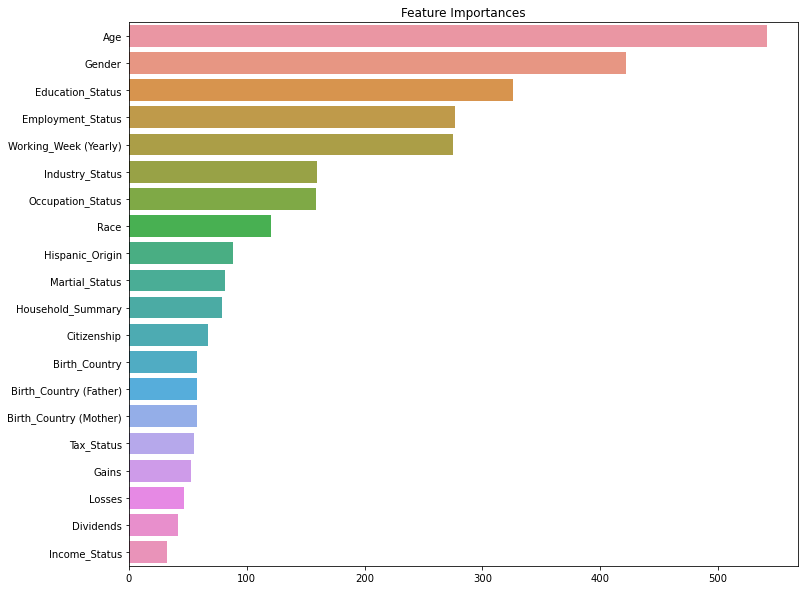

In [25]:
plt.figure(figsize = (12, 10))
plt.title('Feature Importances')
sns.barplot(x = fi, y = X_train.columns)
plt.show()

### 최적화 - 하이퍼 파라미터 튜닝(Grid Search)

In [26]:
param_grid = {
    'learning_rate': [0.05, 0.1],
    'n_estimators': [64],
    'num_leaves': [32],
    'colsample_bytree' : [0.75],
    'min_split_gain' : [0.,0.5,1],
    'subsample' : [0.5, 0.6,],
    'reg_alpha' : [0.25,0.5,0.75],
    }

In [27]:
lgb_grid = GridSearchCV(lgb_model, 
                       param_grid = param_grid, 
                       scoring = 'neg_root_mean_squared_error',
                       n_jobs = -1, 
                       verbose = 1)
lgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.75],
                         'learning_rate': [0.05, 0.1],
                         'min_split_gain': [0.0, 0.5, 1], 'n_estimators': [64],
                         'num_leaves': [32], 'reg_alpha': [0.25, 0.5, 0.75],
                         'subsample': [0.5, 0.6]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [28]:
print('최고 RMSE 값 :', lgb_grid.best_score_)
print('최고의 파라미터 :', lgb_grid.best_params_)

최고 RMSE 값 : -592.6745321874571
최고의 파라미터 : {'colsample_bytree': 0.75, 'learning_rate': 0.05, 'min_split_gain': 0.5, 'n_estimators': 64, 'num_leaves': 32, 'reg_alpha': 0.25, 'subsample': 0.5}


### 최적화 - 재학습

In [29]:
lgb_model2 = LGBMRegressor(colsample_bytree = 0.75, 
                           learning_rate = 0.05, 
                           min_split_gain = 0.5,
                           n_estimators = 64,
                           num_leaves = 32, 
                           reg_alpha = 0.25, 
                           subsample = 0.5)
lgb_model2.fit(X_train, y_train)

LGBMRegressor(colsample_bytree=0.75, learning_rate=0.05, min_split_gain=0.5,
              n_estimators=64, num_leaves=32, reg_alpha=0.25, subsample=0.5)

In [30]:
y_pred2 = lgb_model2.predict(X_test)
y_pred2

array([1166.2564502 ,  734.46898419,  731.70826806, ...,  498.07744516,
        464.15463429,   25.34054566])

In [31]:
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mse2)
print('RMSE :', rmse2)

RMSE : 597.4292224743594


### 최종 제출

In [32]:
prediction = lgb_model2.predict(test)

In [33]:
submission = pd.read_csv('./sample_submission.csv')
submission['Income'] = prediction
submission

,ID,Income
0,TEST_0000,23.869895
1,TEST_0001,29.588905
2,TEST_0002,449.733843
3,TEST_0003,570.759546
4,TEST_0004,15.414648
...,...,...
9995,TEST_9995,814.398142
9996,TEST_9996,774.695235
9997,TEST_9997,383.716546
9998,TEST_9998,19.475755


In [34]:
submission.to_csv('./sample_submission.csv', index=False)